In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine)

['measurement', 'station']

In [6]:
# View all of the classes that automap found
Base.classes.keys()

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [27]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

'2017-08-23'

<Axes: title={'center': 'Inches of Precipitation by Date'}, xlabel='Date', ylabel='Inches'>

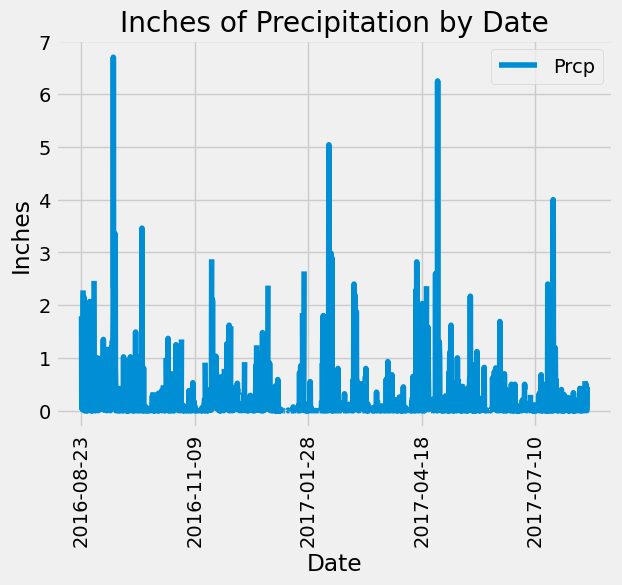

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
percip_year_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(percip_year_query, columns=['Date', 'Prcp'])

# Sort the dataframe by date
precip_df = precip_df.sort_values('Date').set_index('Date', drop=True)

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(ylabel='Inches',
               xlabel='Date',
               title='Inches of Precipitation by Date',
               rot=90)



In [30]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [39]:
# Design a query to calculate the total number stations in the dataset
session.query(Station).count()

9

In [44]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_temp_stats = session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs),
             ).\
    filter(Measurement.station == 'USC00519281').\
    all()[0]

print(f"Lowest Station Temp: {station_temp_stats[0]}")
print(f"Highest Station Temp: {station_temp_stats[1]}")
print(f"Average Station Temp: {station_temp_stats[2]}")

Lowest Station Temp: 54.0
Highest Station Temp: 85.0
Average Station Temp: 71.66378066378067


<Axes: ylabel='Frequency'>

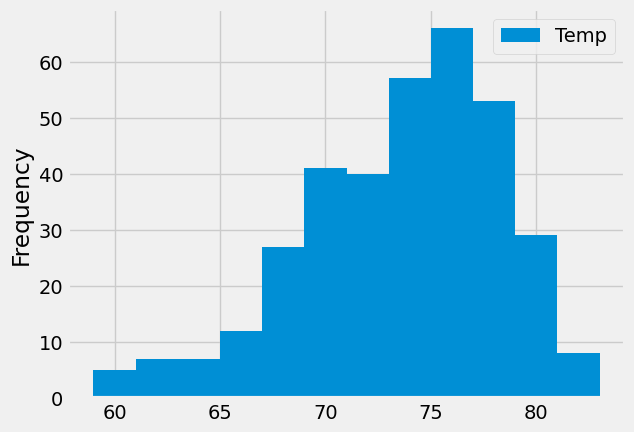

In [61]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_temps = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= '2016-08-23').\
                        filter(Measurement.station == 'USC00519281').\
                        all()

station_temp_df = pd.DataFrame(station_temps, columns=['Date', 'Temp']).\
                    sort_values('Date').\
                    set_index('Date', drop=True)

station_temp_df.plot(kind='hist', bins=12, xlabel='Temperatures', ylabel='Frequency')

# Close session

In [62]:
# Close Session
session.close()